## Topic Modeling of Tweets with Positive Sentiment Related to Abortion
### Berra Karayel 0054477

In [1]:
!pip install git+https://github.com/rwalk/gsdmm.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rwalk/gsdmm.git to /tmp/pip-req-build-20b95u6i
  Running command git clone --filter=blob:none --quiet https://github.com/rwalk/gsdmm.git /tmp/pip-req-build-20b95u6i
  Resolved https://github.com/rwalk/gsdmm.git to commit 4ad1b6b6976743681ee4976b4573463d359214ee
  Preparing metadata (setup.py) ... done
  Created wheel for gsdmm: filename=gsdmm-0.1-py3-none-any.whl size=4601 sha256=2429b5f7c855e511b4740215195f7103771fb7ab2d4eca542d05a459e27250b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-le4mr97b/wheels/68/80/e9/70025f027e5fcf6d826c9c0e0b129c6214e4315e9d82e2dae2
Successfully built gsdmm


In [2]:
import numpy as np 
import pandas as pd

from gsdmm import MovieGroupProcess

from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora, models
from gensim.utils import simple_preprocess
import gensim, spacy
from gensim.models.ldamulticore import LdaMulticore
import re


from gensim.models import Phrases
from gensim.models.phrases import Phraser

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
data1 = pd.read_csv('/content/predictionsofabortion.csv', encoding='utf-8')
data1

,Tweet,Predictions
0,"['kürtaj', 'konusunda', 'kararım', 'net', 'muh...",neutral
1,"['neden', 'kürtaj', 've', 'son', 'çaremi']",neutral
2,"['bilime', 'de', 'el', 'attılari̇stanbul', 'i̇...",neutral
3,"['radikal', 'kürtaj', 'protestosu', 'bariyeri'...",neutral
4,"['kürtaj', 'yapılıyeah']",neutral
...,...,...
204948,"['polonyalı', 'kadınlar', 'direndi', 'kürtaj',...",neutral
204949,"['i̇tiraf', 'ediyorum', 'hem', 'kürtaj', 'oldu...",neutral
204950,"['kürtaj', 'yapıyaa', 'burda']",neutral
204951,"['kürtaj', 'yasal', 'değil', 'isteyenler', 'ağ...",positive


In [5]:
positive = data1[data1["Predictions"] == "positive"]
positive

,Tweet,Predictions
14,"['kürtaj', 'işlemi', 'hem', 'duygusal', 'olara...",positive
19,"['bilinci', 'açıkken', 'içinden', 'bebek', 'va...",positive
27,"['depodan', 'benzin', 'akıyaaah', 'dolar', 'uç...",positive
101,"['mandalar', 'bir', 'araya', 'gelerek', 'basın...",positive
109,"['yanlış', 'anlaşılmasın', 'ama', 'kürtaj', 'm...",positive
...,...,...
204835,"['başbakanın', 'kürtaj', 'konusunda', 'kendisi...",positive
204911,"['herkes', 'mini', 'etek', 'giymeyin', 'gece',...",positive
204916,"['kürtaj', 'muhabbeti', 'açılınca', 'babanın',...",positive
204933,"['bir', 'condom', 'firması', 'bu', 'yıl', '', ...",positive


In [6]:
positive.shape

(9695, 2)

In [7]:
# create N-grams
def make_n_grams(texts):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)  # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[texts], threshold=100)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    bigrams_text = [bigram_mod[doc] for doc in texts]
    trigrams_text =  [trigram_mod[bigram_mod[doc]] for doc in bigrams_text]
    return trigrams_text

In [9]:
positive['Tweet'] = positive.Tweet.values.tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))

<ipython-input-9-edfe80f2b32c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive['Tweet'] = positive.Tweet.values.tolist()


In [10]:
tokens_tweets = list(sent_to_words(positive['Tweet']))

GSDMM

Hyper-parameters of the GSDMM model:

- K = 6. It is the number of clusters. We set this value after several experiments in which we started from 15 clusters. As we increased the number of clusters, the empty clusters started to appear. This was why we settled with 6 clusters. 

Hyperparameters; (These default parameters would work for many short texts.)

- alpha =0.01 1 and beta = 0.01. 

- n_iters = 30.  Number of iteration.

In [11]:
np.random.seed(0) #for reproducability

In [13]:
tokens_tweets = list(sent_to_words(positive["Tweet"]))

In [14]:
mgp = MovieGroupProcess(K=15, alpha=0.01, beta=0.01, n_iters=30) 

vocab = set(x for tweet in tokens_tweets for x in tweet)
n_terms = len(vocab)
model = mgp.fit(tokens_tweets, n_terms)

In stage 0: transferred 7573 clusters with 15 clusters populated
In stage 1: transferred 3535 clusters with 15 clusters populated
In stage 2: transferred 2350 clusters with 15 clusters populated
In stage 3: transferred 1863 clusters with 15 clusters populated
In stage 4: transferred 1593 clusters with 15 clusters populated
In stage 5: transferred 1420 clusters with 15 clusters populated
In stage 6: transferred 1284 clusters with 15 clusters populated
In stage 7: transferred 1227 clusters with 15 clusters populated
In stage 8: transferred 1074 clusters with 15 clusters populated
In stage 9: transferred 1005 clusters with 15 clusters populated
In stage 10: transferred 963 clusters with 15 clusters populated
In stage 11: transferred 964 clusters with 15 clusters populated
In stage 12: transferred 867 clusters with 15 clusters populated
In stage 13: transferred 839 clusters with 15 clusters populated
In stage 14: transferred 821 clusters with 15 clusters populated
In stage 15: transferred 

In [15]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster,sort_dicts))

In [16]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('\nMost important clusters (by number of docs inside):', top_index)
# show the top 5 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 20)

Number of documents per topic : [1207  484  942  558  849  945  168  689  590 1235  317  325  407  235
  744]

Most important clusters (by number of docs inside): [ 9  0  5  2  4 14  7  8  3  1 12 11 10 13  6]

Cluster 9 : [('kürtaj', 1302), ('bir', 824), ('bu', 819), ('kadın', 393), ('ve', 389), ('da', 362), ('değil', 343), ('de', 284), ('çocuk', 280), ('ama', 271), ('için', 235), ('gibi', 233), ('var', 189), ('kendi', 187), ('kimse', 183), ('yok', 173), ('olarak', 164), ('hiçbir', 160), ('karar', 155), ('hak', 138)]

Cluster 0 : [('kürtaj', 1246), ('bu', 769), ('bir', 536), ('da', 280), ('ve', 263), ('değil', 240), ('kadın', 233), ('de', 207), ('var', 186), ('gibi', 182), ('ne', 179), ('ama', 170), ('için', 170), ('çocuk', 170), ('cinayet', 159), ('kadar', 157), ('yok', 152), ('kendi', 135), ('tecavüz', 129), ('hak', 118)]

Cluster 5 : [('kürtaj', 1134), ('yasal', 493), ('bu', 419), ('ve', 356), ('bir', 352), ('için', 217), ('yasak', 212), ('de', 201), ('kadın', 200), ('değil', 199),

In [17]:
gsdmm_clusters = [

["Cluster 9 : [('kürtaj', 1302), ('bir', 824), ('bu', 819), ('kadın', 393), ('ve', 389), ('da', 362), ('değil', 343), ('de', 284), ('çocuk', 280), ('ama', 271), ('için', 235), ('gibi', 233), ('var', 189), ('kendi', 187), ('kimse', 183), ('yok', 173), ('olarak', 164), ('hiçbir', 160), ('karar', 155), ('hak', 138)"],

["Cluster 0 : [('kürtaj', 1246), ('bu', 769), ('bir', 536), ('da', 280), ('ve', 263), ('değil', 240), ('kadın', 233), ('de', 207), ('var', 186), ('gibi', 182), ('ne', 179), ('ama', 170), ('için', 170), ('çocuk', 170), ('cinayet', 159), ('kadar', 157), ('yok', 152), ('kendi', 135), ('tecavüz', 129), ('hak', 118)"],
["Cluster 5 : [('kürtaj', 1134), ('yasal', 493), ('bu', 419), ('ve', 356), ('bir', 352), ('için', 217), ('yasak', 212), ('de', 201), ('kadın', 200), ('değil', 199), ('da', 190), ('devlet', 139), ('var', 135), ('olarak', 127), ('ama', 118), ('kadınlar', 114), ('hakkı', 109), ('gibi', 104), ('kadar', 94), ('kadınların', 94)"],
["Cluster 2 : [('kürtaj', 960), ('bu', 678), ('bir', 300), ('çocuk', 215), ('da', 186), ('gibi', 177), ('değil', 172), ('ve', 172), ('kadın', 163), ('de', 161), ('kadar', 147), ('ne', 146), ('var', 132), ('için', 131), ('çok', 128), ('ama', 127), ('ya', 103), ('yok', 98), ('ben', 87), ('diye', 83)"],
["Cluster 4 : [('kürtaj', 889), ('bu', 541), ('bir', 356), ('tecavüz', 235), ('ve', 224), ('da', 187), ('yasak', 172), ('çocuk', 164), ('kadın', 162), ('ama', 141), ('de', 138), ('gibi', 132), ('değil', 131), ('için', 123), ('yasal', 116), ('devlet', 105), ('var', 95), ('yok', 84), ('olacak', 80), ('kadar', 77)"],
["Cluster 14 : [('kürtaj', 757), ('cinayet', 336), ('mastürbasyon', 258), ('bir', 217), ('ise', 193), ('soykırım', 173), ('bu', 153), ('soykırımdır', 131), ('uludere', 127), ('cinayetse', 119), ('yasak', 108), ('serbest', 105), ('başbakan', 82), ('her', 82), ('ve', 81), ('kadın', 78), ('için', 74), ('da', 71), ('zina', 69), ('değil', 58)"],
["Cluster 7 : [('kürtaj', 690), ('bu', 540), ('bir', 166), ('da', 118), ('gibi', 112), ('yasak', 108), ('ve', 107), ('de', 103), ('için', 97), ('var', 83), ('ama', 81), ('kadar', 81), ('değil', 75), ('çok', 68), ('çocuk', 66), ('yok', 62), ('ne', 60), ('bi', 59), ('devlet', 55), ('cinayet', 51)"],
["Cluster 8 : [('kürtaj', 573), ('bu', 406), ('ve', 243), ('bir', 217), ('gibi', 151), ('kadın', 120), ('de', 101), ('değil', 95), ('da', 95), ('çocuk', 88), ('cinayet', 69), ('ama', 60), ('olarak', 58), ('için', 55), ('var', 55), ('tecavüz', 53), ('çok', 49), ('her', 49), ('diye', 48), ('aynı', 44)"],
["Cluster 3 : [('yasak', 707), ('kürtaj', 517), ('bu', 195), ('serbest', 185), ('tecavüz', 181), ('çocuk', 87), ('bir', 84), ('kadın', 74), ('bi', 72), ('ne', 68), ('ülkede', 67), ('değil', 66), ('en', 55), ('ama', 54), ('da', 46), ('sana', 46), ('içki', 45), ('böyle', 43), ('yok', 40), ('olacak', 39)"],
["Cluster 1 : [('kürtaj', 461), ('çocuk', 213), ('bu', 187), ('yasak', 163), ('doğur', 99), ('kadın', 93), ('devlet', 76), ('sokağa', 73), ('tecavüz', 70), ('hamile', 69), ('da', 69), ('ama', 68), ('çıkma', 67), ('yok', 64), ('direnhamile', 55), ('serbest', 54), ('tecavüze', 54), ('ister', 50), ('az', 50), ('daha', 47)"],
["Cluster 12 : [('kürtaj', 394), ('bu', 250), ('gibi', 85), ('bir', 84), ('ister', 75), ('ve', 64), ('de', 63), ('da', 55), ('benim', 55), ('ne', 53), ('çocuk', 52), ('soykırım', 45), ('değil', 42), ('için', 41), ('en', 39), ('kadar', 38), ('sana', 37), ('kadın', 35), ('aynı', 35), ('var', 34)"],
["Cluster 11 : [('kürtaj', 308), ('bu', 189), ('tek', 84), ('derdi', 70), ('gibi', 64), ('ve', 64), ('bir', 54), ('olarak', 52), ('çocuk', 50), ('muhalefet', 42), ('yok', 39), ('ne', 39), ('ülke', 38), ('diye', 36), ('başbakanın', 36), ('için', 35), ('patates', 35), ('bi', 34), ('allaha', 34), ('liderinin', 34)"],
["Cluster 10 : [('kürtaj', 310), ('kadın', 246), ('ister', 175), ('bu', 115), ('yasak', 113), ('tecavüz', 96), ('daha', 81), ('mıdır', 74), ('yaptıran', 66), ('erkek', 62), ('bir', 61), ('tecavüze', 61), ('kadına', 59), ('kız', 59), ('diyen', 59), ('tecavüzcü', 56), ('çocuk', 52), ('kurbanından', 48), ('devlet', 47), ('uğrayan', 46)"],
["Cluster 13 : [('kürtaj', 201), ('etek', 166), ('mini', 165), ('herkes', 163), ('dışarı', 161), ('tecavüz', 158), ('sebebiyet', 157), ('olmayın', 153), ('de', 145), ('demiyor', 145), ('vermeyin', 143), ('diyor', 131), ('giymeyin', 127), ('gece', 126), ('çıkmayın', 126), ('etmeyin', 126), ('kürtaja', 123), ('kimse', 114), ('etmeyinkürtaja', 39), ('giymeyingece', 38)"],
["Cluster 6 : [('kürtaj', 163), ('ne', 147), ('ister', 133), ('bir', 109), ('çocuk', 84), ('başbakan', 74), ('olan', 69), ('tecavüze', 67), ('kadın', 67), ('az', 65), ('en', 64), ('uğra', 63), ('yap', 62), ('yaptırma', 62), ('tayyip', 60), ('köle', 60), ('ol', 60), ('beyni', 60), ('evinde', 59), ('otur', 59)"]]



In [18]:
gsdmm_clusters = pd.DataFrame.from_dict(gsdmm_clusters)

In [19]:
gsdmm_clusters

,0
0,"Cluster 9 : [('kürtaj', 1302), ('bir', 824), (..."
1,"Cluster 0 : [('kürtaj', 1246), ('bu', 769), ('..."
2,"Cluster 5 : [('kürtaj', 1134), ('yasal', 493),..."
3,"Cluster 2 : [('kürtaj', 960), ('bu', 678), ('b..."
4,"Cluster 4 : [('kürtaj', 889), ('bu', 541), ('b..."
5,"Cluster 14 : [('kürtaj', 757), ('cinayet', 336..."
6,"Cluster 7 : [('kürtaj', 690), ('bu', 540), ('b..."
7,"Cluster 8 : [('kürtaj', 573), ('bu', 406), ('v..."
8,"Cluster 3 : [('yasak', 707), ('kürtaj', 517), ..."
9,"Cluster 1 : [('kürtaj', 461), ('çocuk', 213), ..."


In [20]:
gsdmm_clusters.columns

RangeIndex(start=0, stop=1, step=1)

In [21]:
gsdmm_clusters.rename(columns={0: "Dominant Keywords for GSDMM Clusters"}, inplace=True)

In [22]:
type(gsdmm_clusters)

pandas.core.frame.DataFrame

In [23]:
gsdmm_clusters.columns

Index(['Dominant Keywords for GSDMM Clusters'], dtype='object')

In [24]:
gsdmm_clusters[['Cluster No.(Importance)','Dominant Keywords:GSDMM']] = gsdmm_clusters["Dominant Keywords for GSDMM Clusters"].str.split(":",expand=True,)
gsdmm_clusters

,Dominant Keywords for GSDMM Clusters,Cluster No.(Importance),Dominant Keywords:GSDMM
0,"Cluster 9 : [('kürtaj', 1302), ('bir', 824), (...",Cluster 9,"[('kürtaj', 1302), ('bir', 824), ('bu', 819),..."
1,"Cluster 0 : [('kürtaj', 1246), ('bu', 769), ('...",Cluster 0,"[('kürtaj', 1246), ('bu', 769), ('bir', 536),..."
2,"Cluster 5 : [('kürtaj', 1134), ('yasal', 493),...",Cluster 5,"[('kürtaj', 1134), ('yasal', 493), ('bu', 419..."
3,"Cluster 2 : [('kürtaj', 960), ('bu', 678), ('b...",Cluster 2,"[('kürtaj', 960), ('bu', 678), ('bir', 300), ..."
4,"Cluster 4 : [('kürtaj', 889), ('bu', 541), ('b...",Cluster 4,"[('kürtaj', 889), ('bu', 541), ('bir', 356), ..."
5,"Cluster 14 : [('kürtaj', 757), ('cinayet', 336...",Cluster 14,"[('kürtaj', 757), ('cinayet', 336), ('mastürb..."
6,"Cluster 7 : [('kürtaj', 690), ('bu', 540), ('b...",Cluster 7,"[('kürtaj', 690), ('bu', 540), ('bir', 166), ..."
7,"Cluster 8 : [('kürtaj', 573), ('bu', 406), ('v...",Cluster 8,"[('kürtaj', 573), ('bu', 406), ('ve', 243), (..."
8,"Cluster 3 : [('yasak', 707), ('kürtaj', 517), ...",Cluster 3,"[('yasak', 707), ('kürtaj', 517), ('bu', 195)..."
9,"Cluster 1 : [('kürtaj', 461), ('çocuk', 213), ...",Cluster 1,"[('kürtaj', 461), ('çocuk', 213), ('bu', 187)..."


In [25]:
# I didn`t rename the clusters

topic_dict = {}
topic_names = ['type 1',
               'type 2',
               'type 3',
               'type 4',
               'type 5',
               'type 6',
               'type 7',
               'type 8',
               'type 9',
               'type 10',
               'type 11',
               'type 12',
               'type 13',
               'type 14',
               'type 15'
              ]
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i] 

In [26]:
def create_topics_dataframe(positive_text=positive.Tweet,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=tokens_tweets):
    result = pd.DataFrame(columns=['Text', 'Topic', 'Rating', 'Lemma-text'])
    for i, text in enumerate(positive_text):
        result.at[i, 'Text'] = text
        #result.at[i, 'Rating'] = data.Rating[i]
        result.at[i, 'Lemma-text'] = lemma_text[i]
        prob = mgp.choose_best_label(tokens_tweets[i])
        if prob[1] >= threshold:
            result.at[i, 'Topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'Topic'] = 'Other'
    return result

In [29]:
result = create_topics_dataframe(positive_text=positive.Tweet, mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=tokens_tweets)
result.head(16)

,Text,Topic,Rating,Lemma-text
0,"['kürtaj', 'işlemi', 'hem', 'duygusal', 'olara...",type 1,NaN,"[kürtaj, işlemi, hem, duygusal, olarak, hemde,..."
1,"['bilinci', 'açıkken', 'içinden', 'bebek', 'va...",type 7,NaN,"[bilinci, açıkken, içinden, bebek, vakumlanan,..."
2,"['depodan', 'benzin', 'akıyaaah', 'dolar', 'uç...",type 10,NaN,"[depodan, benzin, akıyaaah, dolar, uçup, gidiy..."
3,"['mandalar', 'bir', 'araya', 'gelerek', 'basın...",type 2,NaN,"[mandalar, bir, araya, gelerek, basın, açıklam..."
4,"['yanlış', 'anlaşılmasın', 'ama', 'kürtaj', 'm...",type 5,NaN,"[yanlış, anlaşılmasın, ama, kürtaj, meselesind..."
5,"['ilin', 'ünde', 'hastanelerde', 'isteğe', 'ba...",type 3,NaN,"[ilin, ünde, hastanelerde, isteğe, bağlı, olar..."
6,"['', 'tüm', 'dünyada', '’den', 'fazla', 'çocuk...",type 3,NaN,"[tüm, dünyada, den, fazla, çocuk, yasaklanmalı..."
7,"['kürtaj', 'olayının', 'akp', 'oylarına', 'etk...",type 2,NaN,"[kürtaj, olayının, akp, oylarına, etkisi, nega..."
8,"['kürtaj', 'konusundaki', 'tepkiler', 'neden',...",type 4,NaN,"[kürtaj, konusundaki, tepkiler, neden, çoğunlu..."
9,"['kürtaj', 'eylül', 'kadınların', 'özel', 'dur...",type 11,NaN,"[kürtaj, eylül, kadınların, özel, durumlarını,..."


# Visualization for the GSDM model


In [30]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import plotly.express as px

fig = px.pie(result, names='Topic',  title="Figure 3. GSDMM for Abortion Tweets with Positive Sentiment", color_discrete_sequence=px.colors.sequential.Burg)
fig.show()

In [33]:
result['len'] = result.Text.apply(lambda row: len(row.split()))
result.head()

,Text,Topic,Rating,Lemma-text,len
0,"['kürtaj', 'işlemi', 'hem', 'duygusal', 'olara...",type 1,NaN,"[kürtaj, işlemi, hem, duygusal, olarak, hemde,...",22
1,"['bilinci', 'açıkken', 'içinden', 'bebek', 'va...",type 7,NaN,"[bilinci, açıkken, içinden, bebek, vakumlanan,...",18
2,"['depodan', 'benzin', 'akıyaaah', 'dolar', 'uç...",type 10,NaN,"[depodan, benzin, akıyaaah, dolar, uçup, gidiy...",10
3,"['mandalar', 'bir', 'araya', 'gelerek', 'basın...",type 2,NaN,"[mandalar, bir, araya, gelerek, basın, açıklam...",17
4,"['yanlış', 'anlaşılmasın', 'ama', 'kürtaj', 'm...",type 5,NaN,"[yanlış, anlaşılmasın, ama, kürtaj, meselesind...",32


In [34]:
import matplotlib.pyplot as plt

## WordClouds

In [35]:
result['Lemma_text'] = result['Lemma-text'].apply(lambda row: ' '.join(row))

In [36]:
result = result.drop('Lemma-text', axis=1)

In [37]:
from wordcloud import WordCloud 

In [38]:
my_stopwords = ["kürtaj", "böyle", "bir", "bu", "şey", "mi", "mı", "var", "ki", "ama", "diye", "her", "hem", "tamam","kadar", "işte", "çi", "çki", "bi", "rbia", "ne", "mıdır", "midir", "da", "le", "el","için", "de","belli", "ve", "değil", "gibi", "ile"]

In [39]:
def create_WordCloud(data, title=None):
    wordcloud = WordCloud(width = 500, height = 500,
                          background_color ='white',
                          min_font_size = 15, stopwords = my_stopwords
                         ).generate(" ".join(data.values))
                      
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=20)
    plt.show() 

In [ ]:
?WordCloud

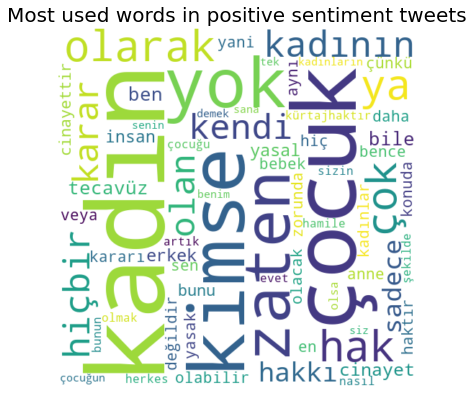

In [40]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 1'], title="Most used words in positive sentiment tweets")

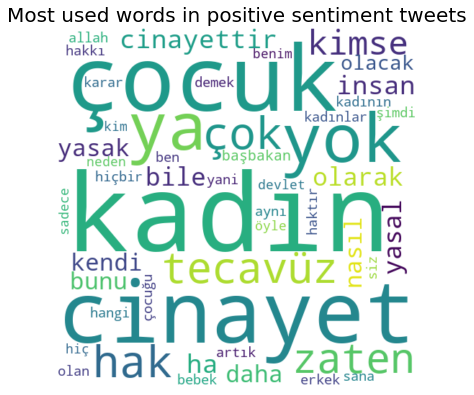

In [41]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 2'], title="Most used words in positive sentiment tweets")

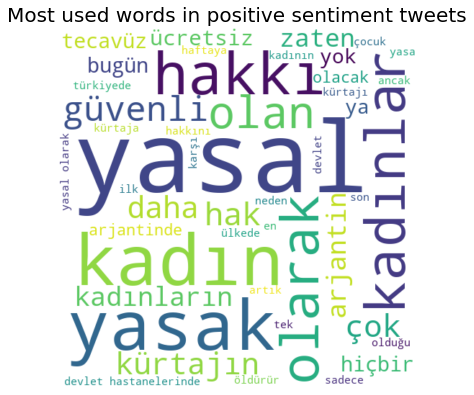

In [42]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 3'], title="Most used words in positive sentiment tweets")

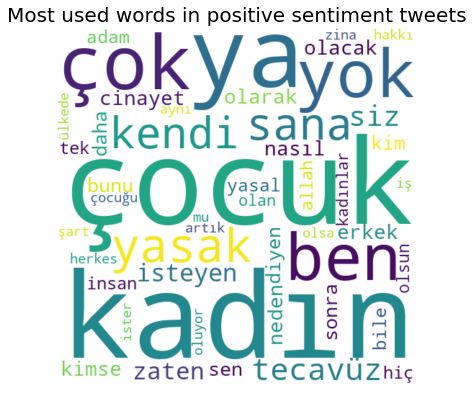

In [43]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 4'], title="Most used words in positive sentiment tweets")

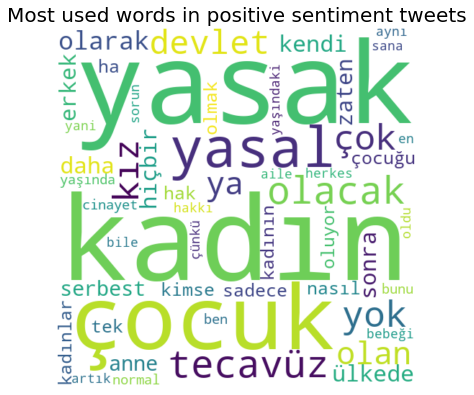

In [44]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 5'], title="Most used words in positive sentiment tweets")

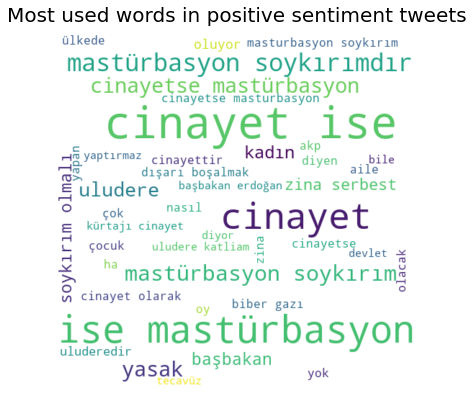

In [45]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 6'], title="Most used words in positive sentiment tweets")

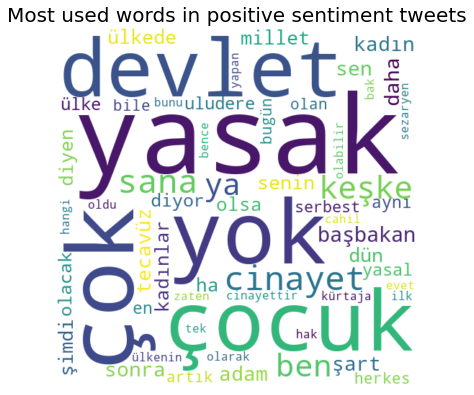

In [46]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 7'], title="Most used words in positive sentiment tweets")

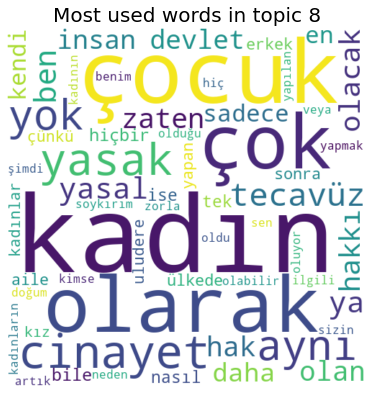

In [47]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 8'], title="Most used words in topic 8")

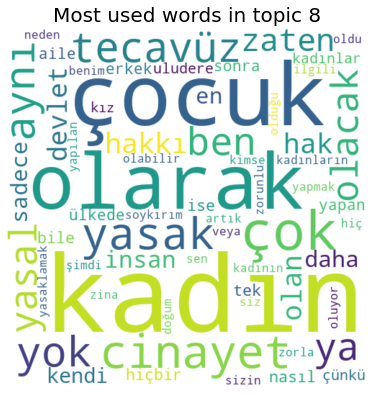

In [48]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 8'], title="Most used words in topic 8")

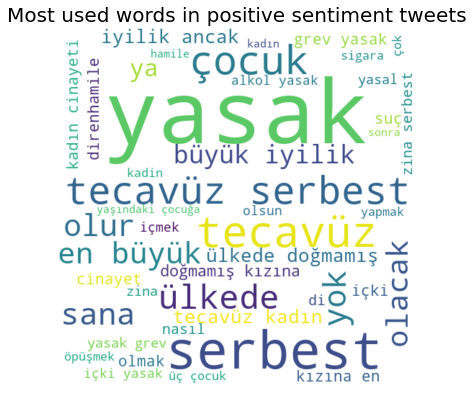

In [50]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 9'], title="Most used words in positive sentiment tweets")

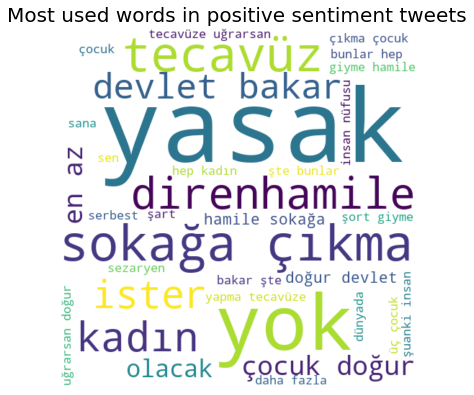

In [51]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 10'], title="Most used words in positive sentiment tweets")

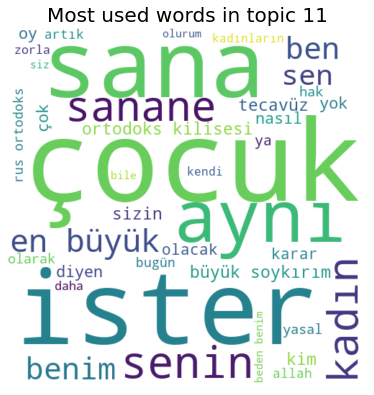

In [52]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 11'], title="Most used words in topic 11")

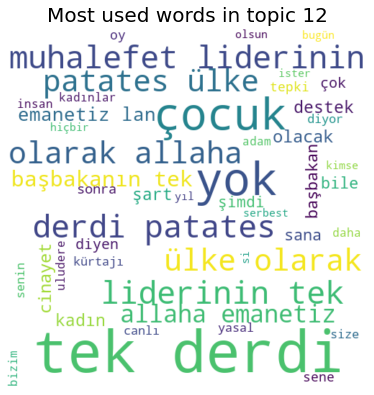

In [53]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 12'], title="Most used words in topic 12")

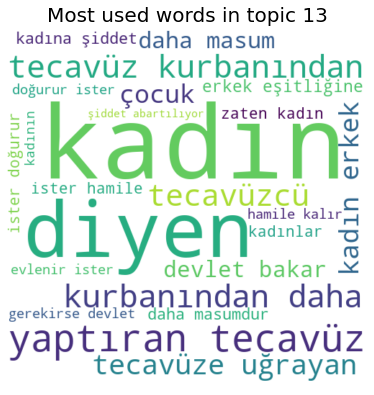

In [54]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 13'], title="Most used words in topic 13")

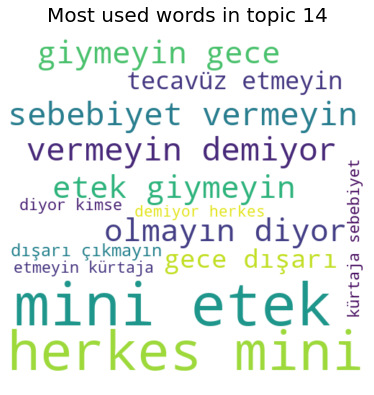

In [55]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 14'], title="Most used words in topic 14")

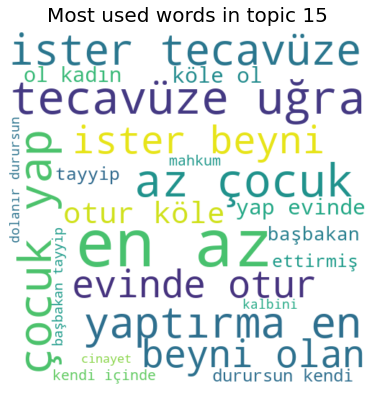

In [56]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 15'], title="Most used words in topic 15")